In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

%matplotlib inline

In [3]:
# Read in Temperature and Saliity data
fn_PSAL = './data/ANMN/BMP120/aggregated/IMOS_ANMN-NSW_SZ_20171119_BMP120_FV01_PSAL-aggregated-timeseries_END-20210119_C-20210426.nc'
fn_TEMP = './data/ANMN/BMP120/aggregated/IMOS_ANMN-NSW_TZ_20110329_BMP120_FV01_TEMP-aggregated-timeseries_END-20210119_C-20210426.nc'
ncPSAL = xr.open_dataset(fn_PSAL)
ncTEMP = xr.open_dataset(fn_TEMP)

In [4]:
# Read in chosen variables to pandas dataframe
dfPSAL = pd.DataFrame({'TIME': ncPSAL.TIME, 'PSAL': ncPSAL.PSAL, 'PSALqc': ncPSAL.PSAL_quality_control,'DEPTH' : ncPSAL.DEPTH, 'DEPTHqc' : ncPSAL.DEPTH_quality_control}).set_index('TIME')
dfTEMP = pd.DataFrame({'TIME': ncTEMP.TIME, 'TEMP': ncTEMP.TEMP, 'TEMPqc': ncTEMP.TEMP_quality_control,'DEPTH' : ncTEMP.DEPTH, 'DEPTHqc' : ncTEMP.DEPTH_quality_control}).set_index('TIME')

In [5]:
# Apply quality control flags
dfPSAL = dfPSAL[(dfPSAL.PSALqc == 1)&(dfPSAL.DEPTHqc == 1)]
dfTEMP = dfTEMP[(dfTEMP.TEMPqc == 1)&(dfTEMP.DEPTHqc == 1)]

<AxesSubplot:xlabel='TIME'>

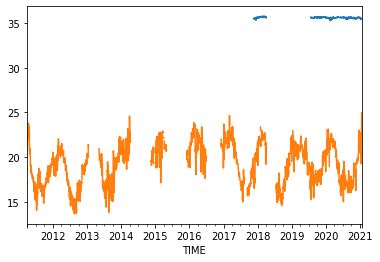

In [6]:
# bin the data into depth bins (set inside the square brackets, using big bins for the moment to keep things simple), the 'labels' field gives the bins a name
binnedPSAL = pd.cut(x=dfPSAL.DEPTH, bins=[10, 25, 60, np.inf], right=False, labels=['surface', '30-60' , 'bottom'])
binnedTEMP = pd.cut(x=dfTEMP.DEPTH, bins=[10, 25, 60, np.inf], right=False, labels=['surface', '30-60' , 'bottom'])
groupedPSAL = dfPSAL.groupby(binnedPSAL)
groupedTEMP = dfTEMP.groupby(binnedTEMP)
surfacePSAL = groupedPSAL.get_group('surface').PSAL.resample('1D').mean()
surfaceTEMP = groupedTEMP.get_group('surface').TEMP.resample('1D').mean()
surfacePSAL.plot()
surfaceTEMP.plot()

In [7]:

surfaceTEMP

TIME
2011-03-29    20.816395
2011-03-30    20.996569
2011-03-31    21.149225
2011-04-01    21.218115
2011-04-02    21.027721
                ...    
2021-01-15    20.002752
2021-01-16    21.602133
2021-01-17    23.789230
2021-01-18    24.904610
2021-01-19    24.963627
Freq: D, Name: TEMP, Length: 3585, dtype: float32

TIME
2017-11-19    35.531544
2017-11-20    35.519264
2017-11-21    35.507656
2017-11-22    35.490723
2017-11-23    35.487228
                ...    
2021-01-15    35.486767
2021-01-16    35.498131
2021-01-17    35.518467
2021-01-18    35.430218
2021-01-19    35.455585
Freq: D, Name: PSAL, Length: 1158, dtype: float32

In [12]:
# Export data to complete anaylsis in R
df_merged = pd.merge(surfaceTEMP, surfacePSAL, on='TIME')
df_merged.to_csv('data/ANMN/custom/surface-series.csv', index=True)  